In [1]:
import matplotlib
#matplotlib.use("TkAgg")
from scipy.io import wavfile
from scipy import signal
from scipy.signal import blackman
#from matplotlib import mlab
from matplotlib import pyplot as plt
import numpy as np
#from numpy.lib import stride_tricks
from pylab import *
from struct import pack
#import pywt
from scipy.fftpack import dct
#from struct import pack
import wave
from scipy.io import wavfile
import os
#import glob

import gc
import multiprocessing as mp
import resource 
import csv
import itertools

import pandas as pd
import ipywidgets as widgets

gc.enable()

flag = 0
date = '20210420'#'20210401'
data_path = 'data/'
mono_path = data_path + "wav/"
stereo_path = data_path + "stereo/"

mono_file_path = mono_path + date + "/"
stereo_file_path = stereo_path + date + "/"

sweep_path = data_path + "sweep/"
sweep_time_path = sweep_path + date + "/"

aud_path = data_path + "aud_times/"
aud_time_path = aud_path + date + "/"

visual_path = 'visual/'

#print os.path.splitext("20171025/data/")[0]

In [2]:
file_list = os.listdir("processed/fft/" + date + "/left/")

In [3]:
feat_list = [ x for x in file_list if "label" not in x ]
feat_list = [ x for x in feat_list if "pred" not in x ]
feat_list = [ x for x in feat_list if "pred_all_labels" not in x ]

In [4]:
label_list = [ x for x in file_list if "label" in x ]
label_list = [ x for x in label_list if "pred" not in x ]

In [5]:
label_list

['label_20210420_16:54:03.307-20210420_16:54:27.170',
 'label_20210420_16:56:04.179-20210420_16:56:29.677',
 'label_20210420_17:29:09.267-20210420_17:29:34.232',
 'label_20210420_17:26:15.413-20210420_17:26:41.035',
 'label_20210420_17:35:28.117-20210420_17:35:50.320',
 'label_20210420_17:37:34.636-20210420_17:38:00.747',
 'label_20210420_17:36:37.452-20210420_17:37:04.285',
 'label_20210420_16:55:14.695-20210420_16:55:38.788',
 'label_20210420_17:38:50.076-20210420_17:39:12.665']

In [6]:
feat_list

['20210420_17:35:28.117-20210420_17:35:50.320',
 '20210420_17:36:37.452-20210420_17:37:04.285',
 '20210420_16:54:03.307-20210420_16:54:27.170',
 '20210420_17:38:50.076-20210420_17:39:12.665',
 '20210420_16:56:04.179-20210420_16:56:29.677',
 '20210420_17:29:09.267-20210420_17:29:34.232',
 '20210420_17:26:15.413-20210420_17:26:41.035',
 '20210420_16:55:14.695-20210420_16:55:38.788',
 '20210420_17:37:34.636-20210420_17:38:00.747']

In [7]:
feat = pd.DataFrame()
labels = pd.DataFrame()
for fl in feat_list:
    f = pd.read_csv("processed/fft/" + date + "/left/" + fl, index_col=0, header=None)
    feat = pd.concat([feat,f], axis=0)
    l = pd.read_csv("processed/fft/" + date + "/left/label_" + fl, index_col=0, header=None)
    labels = pd.concat([labels,l], axis=0)

In [8]:
feat

,1,2,3,4,5,6,7,8,9,10,...,947,948,949,950,951,952,953,954,955,956
0,,,,,,,,,,,,,,,,,,,,,
0.042667,0.066150,0.050186,0.033778,0.017820,0.009576,0.021700,0.037748,0.053736,0.068996,0.083193,...,0.334597,0.327366,0.325372,0.327402,0.332168,0.338486,0.345378,0.352113,0.358197,0.363345
0.051200,0.098472,0.099505,0.101413,0.104148,0.107612,0.111655,0.116093,0.120718,0.125305,0.129624,...,0.585472,0.567586,0.552765,0.540991,0.532127,0.525934,0.522092,0.520233,0.519966,0.520905
0.059733,0.156614,0.154899,0.152888,0.150716,0.148505,0.146358,0.144355,0.142548,0.140957,0.139571,...,0.778100,0.762902,0.747779,0.732951,0.718607,0.704887,0.691876,0.679596,0.668007,0.657005
0.068267,0.159135,0.159393,0.159004,0.157974,0.156322,0.154086,0.151324,0.148120,0.144579,0.140823,...,0.837540,0.834179,0.827486,0.817510,0.804361,0.788201,0.769241,0.747733,0.723967,0.698259
0.076800,0.185930,0.177522,0.167592,0.156325,0.143937,0.130664,0.116762,0.102510,0.088211,0.074228,...,0.773892,0.787312,0.795517,0.798352,0.795723,0.787609,0.774054,0.755174,0.731152,0.702243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.915733,0.121617,0.124201,0.126631,0.129263,0.132480,0.136658,0.142140,0.149204,0.158049,0.168794,...,0.812440,0.807222,0.798881,0.787828,0.774549,0.759590,0.743534,0.726983,0.710525,0.694708
9.924267,0.108561,0.112251,0.113863,0.113336,0.110733,0.106293,0.100523,0.094344,0.089279,0.087492,...,0.558386,0.536875,0.512798,0.487076,0.460759,0.435017,0.411110,0.390322,0.373848,0.362622
9.932800,0.176652,0.165775,0.152829,0.138044,0.121891,0.105234,0.089664,0.078016,0.074370,0.081586,...,0.405066,0.376680,0.345561,0.311974,0.276207,0.238577,0.199444,0.159244,0.118584,0.078623


In [9]:
labels

,1
0,
0.042667,other
0.051200,other
0.059733,other
0.068267,other
0.076800,other
...,...
9.915733,other
9.924267,other
9.932800,other


In [ ]:
import torch.nn as nn
import torch
import torchvision
import torchvision.transforms as transforms
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Add more convolution layers and make the input to the FC small
        self.frequency_feature_extractor = nn.Sequential(
           nn.Conv1d(2, 6, 3, stride=1),
           #nn.MaxPool1d(2,2),nn.ReLU(True),
          nn.Conv1d(6, 16, 3, stride=1),
           #nn.MaxPool1d(2,2),nn.ReLU(True),  
          nn.Conv1d(16, 8, 10, stride=1),
          # nn.MaxPool1d(2,2), nn.ReLU(True),
            nn.Conv1d(8, 10, 3, stride=1),
           #nn.MaxPool1d(2,2), nn.ReLU(True)
        )
        
        self.time_feature_extractor = nn.Sequential(
           nn.Conv2d(2, 6, 3, stride=1),
           nn.MaxPool2d(2,2),nn.ReLU(True),
          nn.Conv2d(6, 16, 3, stride=1),
           nn.MaxPool2d(2,2),nn.ReLU(True),  
          #nn.Conv1d(16, 8, 10, stride=1),
          # nn.MaxPool1d(2,2), nn.ReLU(True),
          #  nn.Conv1d(20, 10, 3, stride=2),
          # nn.MaxPool1d(2,2), nn.ReLU(True)
        )
        
        self.num_cnn_features = 374#932#886#176#496#448#352#94#720
        self.class_classifier = nn.Sequential(
#          nn.Linear(self.num_cnn_features, 80),nn.BatchNorm1d(80),nn.ReLU(True), nn.Dropout(0.2),
#             nn.Linear(80, 20),nn.BatchNorm1d(20),nn.LeakyReLU(True),nn.Dropout(0.2),
#             nn.Linear(20, 10),nn.BatchNorm1d(10),nn.LeakyReLU(True),nn.Dropout(0.2),
#           nn.Linear(10, 4), nn.LeakyReLU(True),
            nn.Linear(self.num_cnn_features, 120),nn.BatchNorm1d(120), nn.LeakyReLU(True),nn.Dropout(0.2),
            nn.Linear(120, 40),nn.BatchNorm1d(40), nn.LeakyReLU(True),nn.Dropout(0.2),
            nn.Linear(40, 10),nn.BatchNorm1d(10), nn.LeakyReLU(True),nn.Dropout(0.2),
            nn.Linear(10, 4), nn.LeakyReLU(True)
        )
        
#         self.domain_classifier = nn.Sequential(
#            nn.Linear(self.num_cnn_features, 120),
#            nn.ReLU(True),
#           nn.Linear(120, 2),
#           nn.LogSoftmax(dim=1),
#         )
        
    def forward(self, x):
        features = x.view(4,-1)
        #print(x.size())
        
#         frequency_domain, time_domain = torch.split(x,[188,744],dim=2)
#         frequency_domain = frequency_domain.view(4,2,int(frequency_domain.size()[2]/2))
#         time_domain = time_domain.view(4,2,31,12)
#         frequency_features = self.frequency_feature_extractor(frequency_domain)
#         time_features = self.time_feature_extractor(time_domain)
#         features = torch.cat((frequency_features.view(4,-1),time_features.view(4,-1)),1)
        #features_grl = GradientReversalFn.apply(features, grl_lambda)
        class_pred = self.class_classifier(features) #classify on regular features
        #domain_pred = self.domain_classifier(features_grl) #classify on features after GRL
        return class_pred

In [189]:
lab_list

[['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['other'],
 ['o

In [201]:
labels[labels.columns[0]].tolist()

['other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',


In [205]:
lab_list = labels[labels.columns[0]].tolist()
#flat_list = [item for lab_list in t for item in lab_list]
feat.index = lab_list

In [206]:
feat

,1,2,3,4,5,6,7,8,9,10,...,947,948,949,950,951,952,953,954,955,956
other,0.066150,0.050186,0.033778,0.017820,0.009576,0.021700,0.037748,0.053736,0.068996,0.083193,...,0.334597,0.327366,0.325372,0.327402,0.332168,0.338486,0.345378,0.352113,0.358197,0.363345
other,0.098472,0.099505,0.101413,0.104148,0.107612,0.111655,0.116093,0.120718,0.125305,0.129624,...,0.585472,0.567586,0.552765,0.540991,0.532127,0.525934,0.522092,0.520233,0.519966,0.520905
other,0.156614,0.154899,0.152888,0.150716,0.148505,0.146358,0.144355,0.142548,0.140957,0.139571,...,0.778100,0.762902,0.747779,0.732951,0.718607,0.704887,0.691876,0.679596,0.668007,0.657005
other,0.159135,0.159393,0.159004,0.157974,0.156322,0.154086,0.151324,0.148120,0.144579,0.140823,...,0.837540,0.834179,0.827486,0.817510,0.804361,0.788201,0.769241,0.747733,0.723967,0.698259
other,0.185930,0.177522,0.167592,0.156325,0.143937,0.130664,0.116762,0.102510,0.088211,0.074228,...,0.773892,0.787312,0.795517,0.798352,0.795723,0.787609,0.774054,0.755174,0.731152,0.702243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
other,0.121617,0.124201,0.126631,0.129263,0.132480,0.136658,0.142140,0.149204,0.158049,0.168794,...,0.812440,0.807222,0.798881,0.787828,0.774549,0.759590,0.743534,0.726983,0.710525,0.694708
other,0.108561,0.112251,0.113863,0.113336,0.110733,0.106293,0.100523,0.094344,0.089279,0.087492,...,0.558386,0.536875,0.512798,0.487076,0.460759,0.435017,0.411110,0.390322,0.373848,0.362622
other,0.176652,0.165775,0.152829,0.138044,0.121891,0.105234,0.089664,0.078016,0.074370,0.081586,...,0.405066,0.376680,0.345561,0.311974,0.276207,0.238577,0.199444,0.159244,0.118584,0.078623
other,0.270302,0.264596,0.260832,0.259349,0.260386,0.264047,0.270292,0.278948,0.289739,0.302327,...,0.390304,0.375357,0.359435,0.342830,0.325904,0.309093,0.292906,0.277917,0.264744,0.254002


In [207]:
feat.drop(index = 'other',inplace=True)
feat.drop(index = 'front',inplace=True)
feat.drop(index = 'back',inplace=True)

In [211]:
labels=feat.index

In [212]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
def SMOTE_oversampling(training_data,training_labels):
    #training_labels = all_mots[[1]]
    #all_mots.drop([0],axis=1,inplace=True)
    #all_mots.drop([1],axis=1,inplace=True)
    #training_data = all_mots 
    ros = SMOTE(sampling_strategy={'car':300,'signpost':300,'tree':300,'wall':300},random_state=0)
    X_resampled, y_resampled = ros.fit_resample(training_data, training_labels)
    return X_resampled, y_resampled

# N-fold CV

In [213]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, criterion="entropy",
                               max_features = 'sqrt')
#scores = cross_val_score(model, feat, labels, cv=5)
y_pred = cross_val_predict(model, feat, labels, cv=5)
conf_mat = confusion_matrix(labels, y_pred)
class_report = classification_report(labels, y_pred)

In [214]:
conf_mat = confusion_matrix(labels, y_pred)
class_report = classification_report(labels, y_pred)

In [215]:
print(conf_mat)
print(class_report)

[[ 600  327]
 [ 126 2082]]
               precision    recall  f1-score   support

front-walking       0.83      0.65      0.73       927
       waking       0.86      0.94      0.90      2208

     accuracy                           0.86      3135
    macro avg       0.85      0.80      0.81      3135
 weighted avg       0.85      0.86      0.85      3135



In [150]:
labels

,1
0,
0.042667,other
0.051200,other
0.059733,other
0.068267,other
0.076800,other
...,...
9.915733,other
9.924267,other
9.932800,other


# Leave-one-session-out CV

In [154]:
from sklearn.metrics import confusion_matrix, classification_report

In [155]:
def randomForest(train, train_labels):
    # Create the model with 100 trees
    model = RandomForestClassifier(n_estimators=100, criterion="entropy",
                                   max_features = 'sqrt')
    # Fit on training data
    model.fit(train, train_labels)
    #pickle.dump(model, open(root + str(test_env) + "/training_phase/" + "randomForest.sav", 'wb'))
    return model 

In [224]:
pred_list = pd.DataFrame()
true_list = pd.DataFrame()
feat_list = ['20210420_16:54:03.307-20210420_16:54:27.170','20210420_16:55:14.695-20210420_16:55:38.788','20210420_16:56:04.179-20210420_16:56:29.677']
for session in feat_list:
    X_test = pd.DataFrame()
    y_test = pd.DataFrame()
    X_train = pd.DataFrame()
    y_train = pd.DataFrame()
    test_list = session
    train_list = [x for x in feat_list if x != session]   
    f = pd.read_csv("processed/fft/" + date + "/left/" + test_list, index_col=0, header=None)
    X_test = pd.concat([X_test,f], axis=0)
    l = pd.read_csv("processed/fft/" + date + "/left/label_" + test_list, index_col=0, header=None)
    y_test = pd.concat([y_test,l], axis=0)
    for t in train_list:
        f = pd.read_csv("processed/fft/" + date + "/left/" + t, index_col=0, header=None)
        X_train = pd.concat([X_train,f], axis=0)
        l = pd.read_csv("processed/fft/" + date + "/left/label_" + t, index_col=0, header=None)
        y_train = pd.concat([y_train,l], axis=0)
        
    model = randomForest(X_train,y_train)
    pred = model.predict(X_test)
    
    conf_mat = confusion_matrix(y_test, pred)
    class_report = classification_report(y_test, pred)
    
    print(conf_mat)
    print(class_report)
    
    pd_pred = pd.DataFrame(pred)
    pd_pred.index = X_test.index
    
    pred_list = pd.concat([pred_list,pd_pred],axis=0)
    true_list = pd.concat([true_list,y_test],axis=0)
    
    pd_pred.to_csv("processed/fft/" + date + "/left/pred_all_labels" + session,header=False,index=True)
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[253  40]
 [137 732]]
               precision    recall  f1-score   support

front-walking       0.65      0.86      0.74       293
       waking       0.95      0.84      0.89       869

     accuracy                           0.85      1162
    macro avg       0.80      0.85      0.82      1162
 weighted avg       0.87      0.85      0.85      1162



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[137 180]
 [  6 488]]
               precision    recall  f1-score   support

front-walking       0.96      0.43      0.60       317
       waking       0.73      0.99      0.84       494

     accuracy                           0.77       811
    macro avg       0.84      0.71      0.72       811
 weighted avg       0.82      0.77      0.74       811



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[238  79]
 [ 10 835]]
               precision    recall  f1-score   support

front-walking       0.96      0.75      0.84       317
       waking       0.91      0.99      0.95       845

     accuracy                           0.92      1162
    macro avg       0.94      0.87      0.90      1162
 weighted avg       0.93      0.92      0.92      1162



In [158]:
test_list

'20210420_17:36:37.452-20210420_17:37:04.285'

In [159]:
train_list

['20210420_17:35:28.117-20210420_17:35:50.320',
 '20210420_16:54:03.307-20210420_16:54:27.170',
 '20210420_17:38:50.076-20210420_17:39:12.665',
 '20210420_16:56:04.179-20210420_16:56:29.677',
 '20210420_17:29:09.267-20210420_17:29:34.232',
 '20210420_17:26:15.413-20210420_17:26:41.035',
 '20210420_16:55:14.695-20210420_16:55:38.788',
 '20210420_17:37:34.636-20210420_17:38:00.747']

In [160]:
np.unique(y_train)

array(['back', 'front', 'front-walking', 'other', 'waking'], dtype=object)

In [223]:
conf_mat = confusion_matrix(true_list, pred_list)
class_report = classification_report(true_list, pred_list)

print(conf_mat)
print(class_report)

[[ 620  307]
 [ 176 2032]]
               precision    recall  f1-score   support

front-walking       0.78      0.67      0.72       927
       waking       0.87      0.92      0.89      2208

     accuracy                           0.85      3135
    macro avg       0.82      0.79      0.81      3135
 weighted avg       0.84      0.85      0.84      3135



# Visualizing results

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


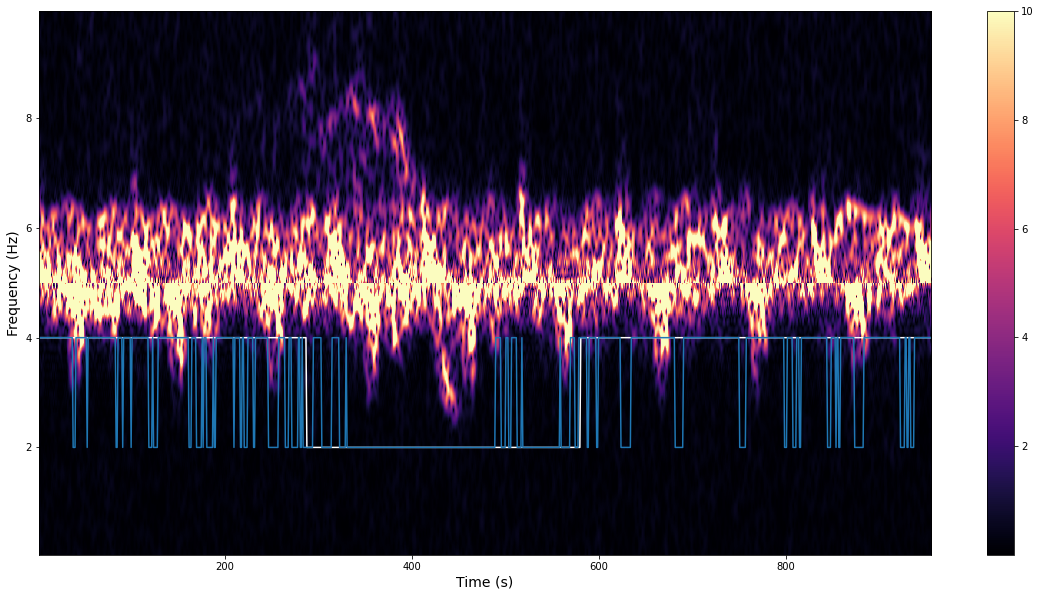

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


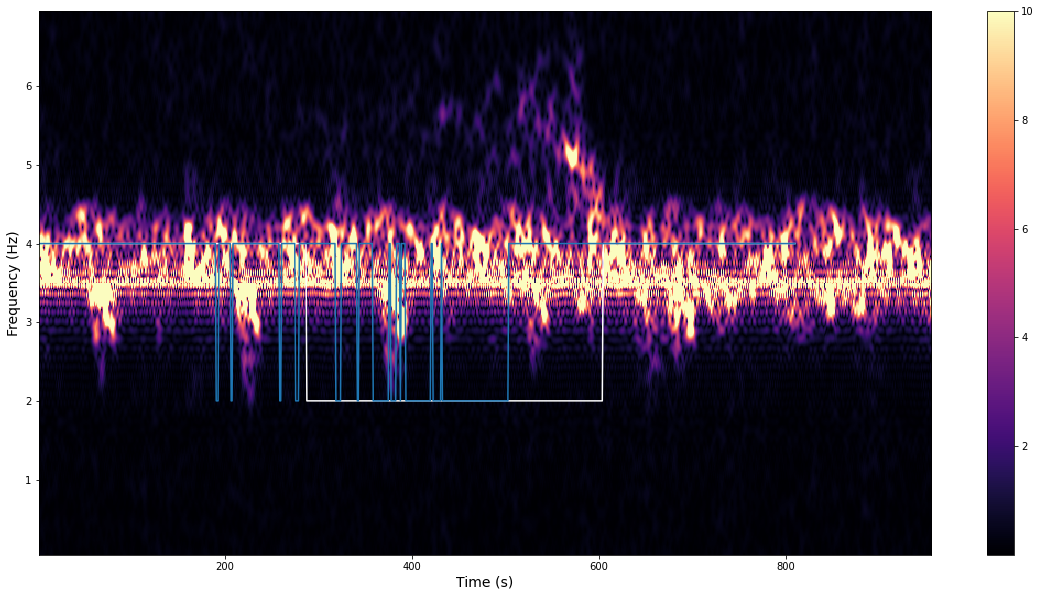

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


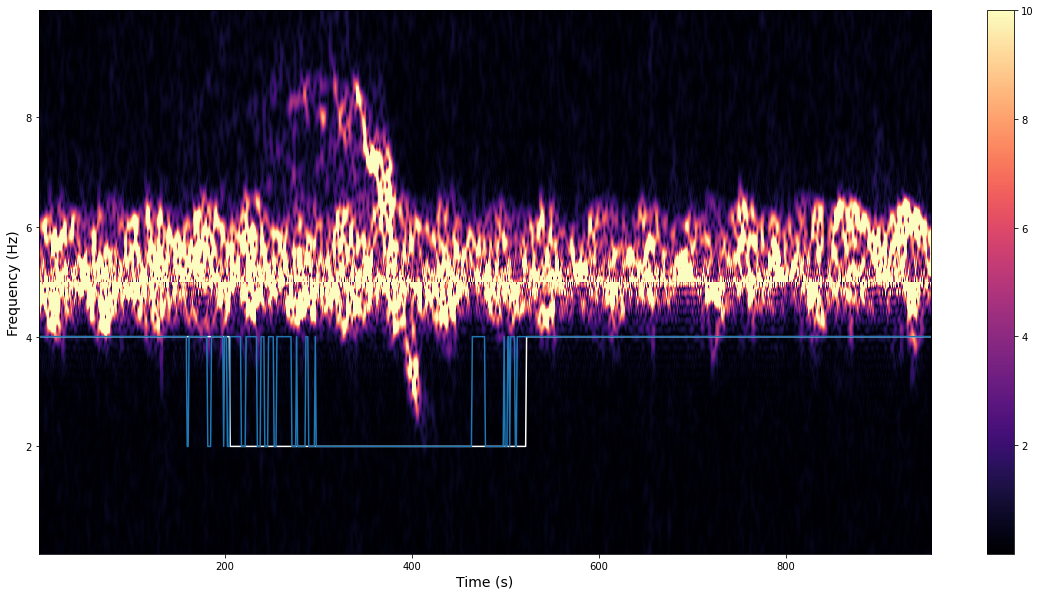

In [222]:
for session in feat_list:
    feature = pd.read_csv("processed/fft/" + date + "/left/" + session, index_col=0, header=None)
    true_label = pd.read_csv("processed/fft/" + date + "/left/label_" + session, index_col=0, header=None)
    pred_label = pd.read_csv("processed/fft/" + date + "/left/pred_all_labels" + session, index_col=0, header=None)
    
    #display(true_label.head())
    
    #true_label.drop('0',axis=1)
    #pred_label.drop('0',axis=1)
    
    #feature.reset_index(inplace=True)
    #true_label.reset_index(inplace=True)
    #pred_label.reset_index(inplace=True)
    
    e_true_label = le.transform(true_label)
    e_pred_label = le.transform(pred_label)
    
    visualize(feature, e_true_label, e_pred_label)
    #break

In [108]:
feature = feature.reset_index(drop=True)

In [107]:
true_label = true_label.reset_index(drop=True)

In [109]:
true_label

,1
0,other
1,other
2,other
3,other
4,other
...,...
688,other
689,other
690,other
691,other


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


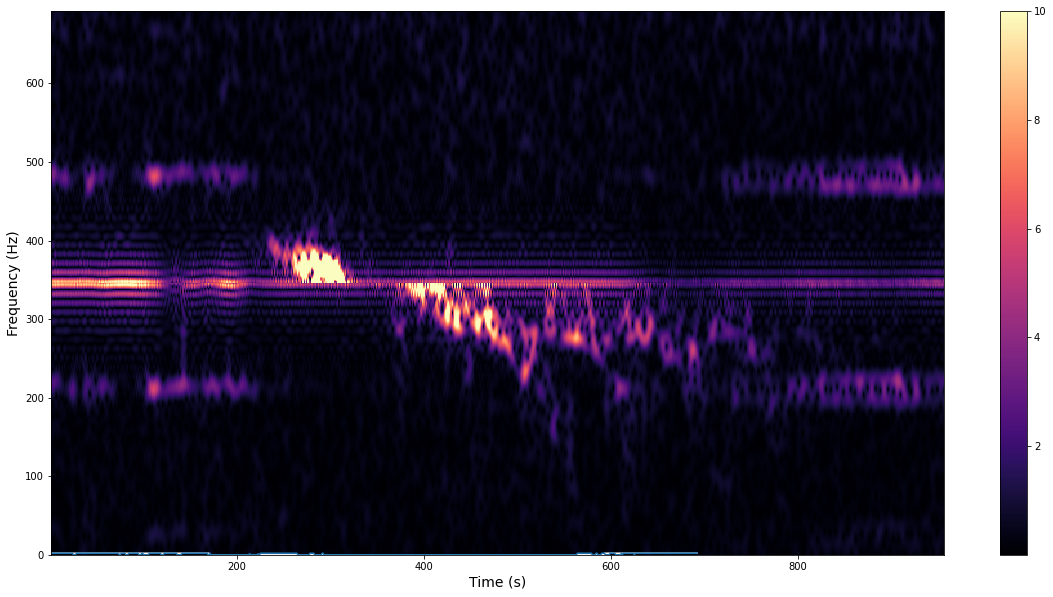

In [112]:
e_true_label = le.transform(true_label)
e_pred_label = le.transform(pred_label)

visualize(feature, e_true_label, e_pred_label)

In [218]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['front','back','other', 'waking', 'front-walking'])
e_true_label = le.transform(true_label)
e_pred_label = le.transform(pred_label)

In [95]:
true_label

,0,1
0,0.042667,other
1,0.051200,other
2,0.059733,other
3,0.068267,other
4,0.076800,other
...,...,...
688,5.913600,other
689,5.922133,other
690,5.930667,other
691,5.939200,other


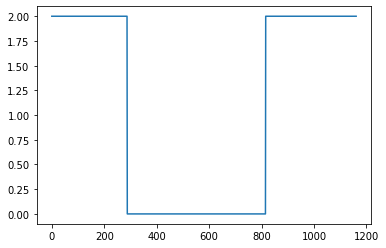

In [65]:
plt.plot(e_true_label)

In [77]:
def visualize(feature, e_true_label, e_pred_label):
    plt.figure(figsize=(20,10))
    #plt.xticks(cadence.columns, fontsize=9)
    plt.plot(e_true_label, color='w')
    plt.plot(e_pred_label)
    #plt.yticks(cadence.index.values.tolist(), fontsize=9)
    plt.xlabel("Time (s)", fontsize=14)
    plt.ylabel("Frequency (Hz)", fontsize=14)
    plt.imshow(feature.T,cmap='magma',vmax=10,interpolation='nearest', origin='lower',extent=[feature.columns.values[0],feature.columns.values[-1],feature.index.values[0],feature.index.values[-1]], aspect='auto')

    plt.colorbar()
    plt.show()

In [70]:
len(feature)

1162

In [71]:
len(e_true_label)

1162